In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
ed_exp = pd.read_csv("Resources/SYB63_245_202009_Public_Expenditure_on_Education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_prv = pd.read_csv('Resources/crime_prevelence-youth.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')
crm_enter = pd.read_csv('Resources/crime_entering_prison.csv')

In [3]:
ed_exp=ed_exp.drop('Region/Country/Area',axis=1)

In [4]:
ed_exp=ed_exp.rename(columns={"Unnamed: 1":"Country"})

In [5]:
ed_exp=ed_exp.drop('Source',axis=1)

In [6]:
ed_exp=ed_exp.drop('Footnotes',axis=1)

In [7]:
ed_exp=ed_exp.rename(columns={"Value":"Value %"})

In [8]:
ed_exp=ed_exp.loc[ed_exp["Series"]=="Government expenditure on education (% of government expenditure)"]

In [9]:
ed_exp_mean=ed_exp.groupby("Country")["Value %"].mean()

In [10]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Country,Value %
0,Afghanistan,15.079333
1,Albania,10.935840
2,Algeria,11.428400
3,Andorra,19.406100
4,Angola,8.044000
...,...,...
175,Vanuatu,25.239017
176,Viet Nam,16.699433
177,Yemen,21.405250
178,Zambia,12.508443


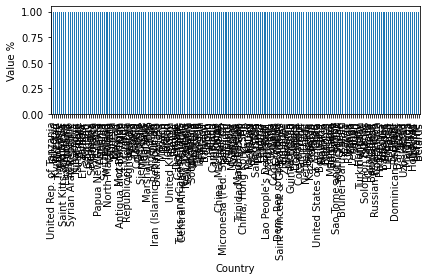

In [11]:
ed_exp_mean['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Value %')
plt.tight_layout()
# x_values=ed_exp_mean['Country']
# y_values=ed_exp_mean['Value %']
# plt.scatter(x_values,y_values,edgecolor='black', alpha=0.75)
# plt.title('Country Education Expenditure')
# plt.xlabel('Country')
# plt.ylabel('Governemnt Expenditure %')

In [12]:
top_exp = ed_exp_mean.sort_values(by='Value %',ascending=False)
top_10=top_exp.head(10)
top_10.reset_index()

,index,Country,Value %
0,175,Vanuatu,25.239017
1,164,Tunisia,24.483017
2,92,Lesotho,23.711100
3,174,Uzbekistan,23.338350
4,146,Singapore,23.229900
5,57,Ethiopia,23.196833
6,41,Costa Rica,23.192975
7,22,Botswana,23.150450
8,67,Guatemala,22.620025
9,85,Kenya,22.590600


In [13]:
bottom_exp = ed_exp_mean.sort_values(by='Value %')
bottom_10=bottom_exp.head(10)
bottom_10.reset_index()

,index,Country,Value %
0,151,South Sudan,2.052740
1,54,Eritrea,5.514467
2,107,Monaco,6.175060
3,93,Liberia,6.648650
4,91,Lebanon,7.066225
5,32,Central African Republic,7.960350
6,4,Angola,8.044000
7,13,Bahrain,8.108060
8,160,Timor-Leste,8.124550
9,165,Turkey,8.334350


In [14]:
merged_exp=pd.merge(top_10,bottom_10)
merged_exp


,Country,Value %


IndexError: index 0 is out of bounds for axis 0 with size 0

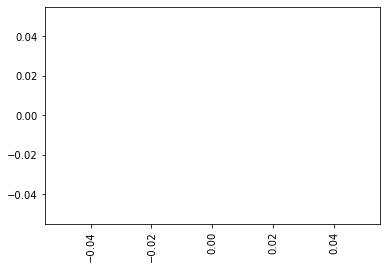

In [15]:
merged_exp['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Value %')
#plt.tight_layout()
# x_values=ed_exp_mean['Country']
# y_values=ed_exp_mean['Value %']
# plt.scatter(x_values,y_values,edgecolor='black', alpha=0.75)
# plt.title('Country Education Expenditure')
# plt.xlabel('Country')
# plt.ylabel('Governemnt Expenditure %')